In [88]:
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

(512, 512)


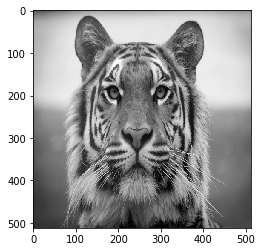

In [89]:
im = cv2.imread('08.png',0)
print(im.shape)
plt.imshow(im,cmap='gray')

# Décomposition en Ondelette

In [120]:
def histogram(array,level):
    plt.figure()
    hist, bin_edges = np.histogram(array,bins=100)
    plt.plot(bin_edges[1:],hist)
    plt.title(f"level : n={level}")

In [121]:
nb_level = 3

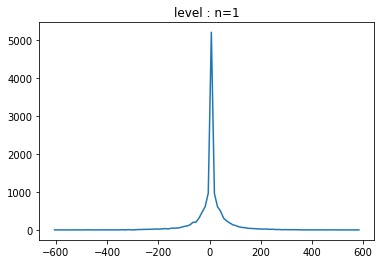

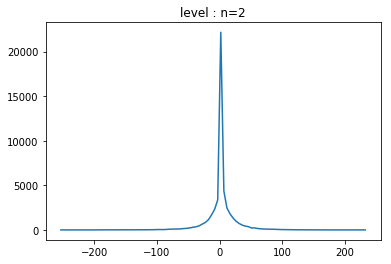

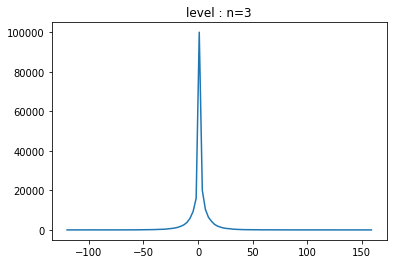

In [134]:
# compute the 2D DWT
c = pywt.wavedec2(im, 'db2', mode='periodization', level=nb_level)
arr, slices = pywt.coeffs_to_array(c)
for level in range(1,nb_level+1):
    histogram(np.concatenate((c[level][0],c[level][1],c[level][2])),level)

## Quantification

In [145]:
delta = 1


for level in range(1,nb_level+1):
    for detail in range(3):
        q[level][detail] = np.fix(c[level][detail]/delta)

c:\Python37\lib\site-packages\numpy\lib\function_base.py:804: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


TypeError: 'tuple' object does not support item assignment

## Reconstruction

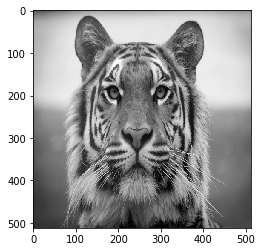

In [135]:
im_rec = pywt.waverec2(c,'db2', mode='periodization')
plt.imshow(im_rec,cmap='gray')

In [136]:
def comp_rmse(im_comp,im_ori):
    return np.sqrt(np.linalg.norm(im_comp-im_ori)**2/im_ori.shape[0]*im_ori.shape[1])

In [137]:
print(f"Error : {comp_rmse(im_rec,im)}")

Error : 4.992817224217034e-11
